## Homework 2: Wine Quality Prediction Using SGD
### Student Name: Graeme Holliday
### Department: Computer Science
### Course: CS 474/574: Deep Learning/2020 Fall
### Due: 09/25/2020


Description: In this homework, you are going to implement the stochastic gradient optimization (mini-batch) to solve the wine quality prediction problem. Using the following code as your template. Specific requirements:

1. Use the SGD function definition given in the code (def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):); and do not change it.

2. SGD implementation. 35 pts
    - Shuffle data (X and Y) at the beginning of each epoch. (10 pts)
    - update w using minibatches correctly. (10 pts)
    - record the loss and w at the end of each epoch. (10 pts)
    - Decay learning rate at the end of each epoch. (5 points)
    
3. Evaluation (cross-validation). 65 pts
    - Split the dataset into training (70%) and test (30%) sets. (10 points)
    - Calculate and print out the MSE and MAE of GD for the training and test sets, respectively. (20 points)
        - Print formate: 
            The training MSE is: , the traing MAE is: .
            The test MSE is: , the test MAE is: .               
    - Calculate and print out the MSE and MAE of SGD for the training and test sets, respectively. (20 points)
         - Print formate: 
            The training MSE is: , the traing MAE is: .
            The test MSE is: , the test MAE is: . 
            
    - Plot the loss curve for SGD. (5 points)
        - tip: using the 'plot' function in matplotlib
        
    - Plot the mse curves on the training and test sets, respectively, over the weight sequence (w_hist). (10 points)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## (1) Data preparation
df = pd.read_csv('winequality-white.csv', sep = ';')
X = df.values[:, :11]
Y = df.values[:, 11]
print('Data shape:', 'X:', X.shape, 'Y:', Y.shape)

# data normalization
min_vals = np.min(X, axis = 0)
max_vals = np.max(X, axis = 0)
X1 = (X-min_vals)/(max_vals-min_vals)

##(2) Assume a linear mode that y = w0*1 + w_1*x_1 +w_2*x_2+...+ w_11*x_11
def predict(X, w):
    '''
    X: input feature vectors:m*n
    w: weights
    
    return Y_hat
    '''
    # Prediction
    Y_hat = np.zeros((X.shape[0]))
    for idx, x in enumerate(X):          
        y_hat = w[0] + np.dot(w[1:].T, np.c_[x]) # linear model
        Y_hat[idx] = y_hat    
    return Y_hat

## (3) Loss function: L = 1/2 * sum(y_hat_i - y_i)^2
def loss(w, X, Y):
    '''
    w: weights
    X: input feature vectors
    Y: targets
    '''
    Y_hat = predict(X, w)
    loss = 1/2* np.sum(np.square(Y - Y_hat))
    
    return loss

# Optimization 1: Gradient Descent
def GD(X, Y, lr = 0.001, delta = 0.01, max_iter = 100):
    '''
    X: training data
    Y: training target
    lr: learning rate
    max_iter: the max iterations
    '''
    
    m = len(Y)
    b = np.reshape(Y, [Y.shape[0],1])
    w = np.random.rand(X.shape[1] + 1, 1)
    A = np.c_[np.ones((m, 1)), X]
    gradient = A.T.dot(np.dot(A, w) - b)
    
    loss_hist = np.zeros(max_iter) # history of loss
    w_hist = np.zeros((max_iter, w.shape[0])) # history of weight
    loss_w = 0
    i = 0                  
    while(np.linalg.norm(gradient) > delta) and (i < max_iter):
        w_hist[i,:] = w.T
        loss_w = loss(w, X, Y)
        print(i, 'loss:', loss_w)
        loss_hist[i] = loss_w
        
        w = w - lr * gradient        
        gradient = A.T.dot(np.dot(A, w) - b) # update the gradient using new w
        i = i + 1
        
    w_star = w  
    return w_star, loss_hist, w_hist

Data shape: X: (4898, 11) Y: (4898,)


In [1]:
# Optimization 2: implement the minibatch Gradient Descent approach
def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):
    '''
    X: training data
    Y: training target
    lr: learning rate
    batch_size: batch size
    epoch: number of max epoches
    
    return: w_star, loss_hist, w_hist
    '''
    
    m = len(Y)
    w = np.random.rand(X.shape[1] + 1, 1)
    loss_hist = np.zeros(epoch) # loss history
    w_hist = np.zeros((epoch, w.shape[0])) #w history

    #Add your code here
    #------------------------
    #for i in range(epoch):
        #(2)shuffle the data and prepare batches
        
        
        #for b in range(int(m/batch_size)):
        
            
    #--------------------------
    
    w_star = w  
    return w_star, loss_hist, w_hist

IndentationError: expected an indented block (<ipython-input-1-f8da68d7a402>, line 27)

In [5]:
# x_train, y_train, x_test, y_test = train_test_split but not scikitlearn, 70% uniform
# SGD(x_train, y_train)
# learning rate decay?
# call w_star, w_hist, loss_hist = SGD(x_train, y_train)
# Y_train_hat = predict(x_train, w_star)
# Y_test_hat = predict(x_test, w_star)
# compare those MSEs and MAEs
# SGD func returns loss hist, plot it
# Plot MSE curves

0 loss: 44423.48139380223
1 loss: 2452783.991868393
2 loss: 141638960.30512464
3 loss: 8185240956.263145
4 loss: 473026641789.41504
5 loss: 27336305872287.04
6 loss: 1579770683829176.0
7 loss: 9.129526956913907e+16
8 loss: 5.27597222244155e+18
9 loss: 3.0489950928831906e+20


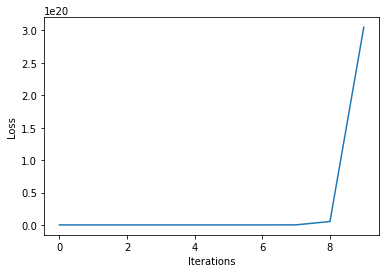

In [6]:
# Example
w_star, loss_hist, w_hist = GD(X1, Y, lr = 0.001, delta = 0.01, max_iter = 10)

# show the Loss curve
from matplotlib import pyplot as plt
plt.plot(range(10), loss_hist)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()